In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
ProbP = np.linspace(.01,.99,101)

In [14]:
ProbP

array([0.01  , 0.0198, 0.0296, 0.0394, 0.0492, 0.059 , 0.0688, 0.0786,
       0.0884, 0.0982, 0.108 , 0.1178, 0.1276, 0.1374, 0.1472, 0.157 ,
       0.1668, 0.1766, 0.1864, 0.1962, 0.206 , 0.2158, 0.2256, 0.2354,
       0.2452, 0.255 , 0.2648, 0.2746, 0.2844, 0.2942, 0.304 , 0.3138,
       0.3236, 0.3334, 0.3432, 0.353 , 0.3628, 0.3726, 0.3824, 0.3922,
       0.402 , 0.4118, 0.4216, 0.4314, 0.4412, 0.451 , 0.4608, 0.4706,
       0.4804, 0.4902, 0.5   , 0.5098, 0.5196, 0.5294, 0.5392, 0.549 ,
       0.5588, 0.5686, 0.5784, 0.5882, 0.598 , 0.6078, 0.6176, 0.6274,
       0.6372, 0.647 , 0.6568, 0.6666, 0.6764, 0.6862, 0.696 , 0.7058,
       0.7156, 0.7254, 0.7352, 0.745 , 0.7548, 0.7646, 0.7744, 0.7842,
       0.794 , 0.8038, 0.8136, 0.8234, 0.8332, 0.843 , 0.8528, 0.8626,
       0.8724, 0.8822, 0.892 , 0.9018, 0.9116, 0.9214, 0.9312, 0.941 ,
       0.9508, 0.9606, 0.9704, 0.9802, 0.99  ])

In [15]:
OddsRatio = ProbP / (1 - ProbP)

In [16]:
Log_OR = np.log(OddsRatio)

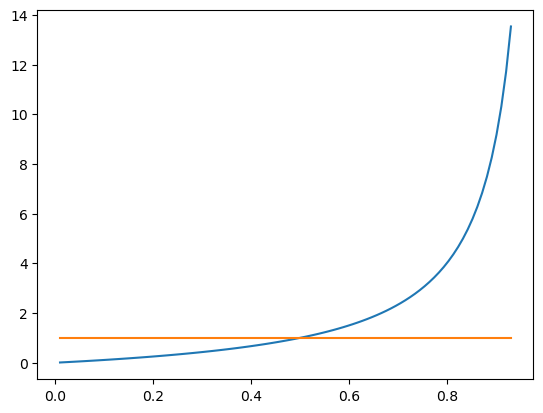

In [29]:
plt.plot(ProbP[:95], OddsRatio[:95])
plt.plot(ProbP[:95], np.ones(95))

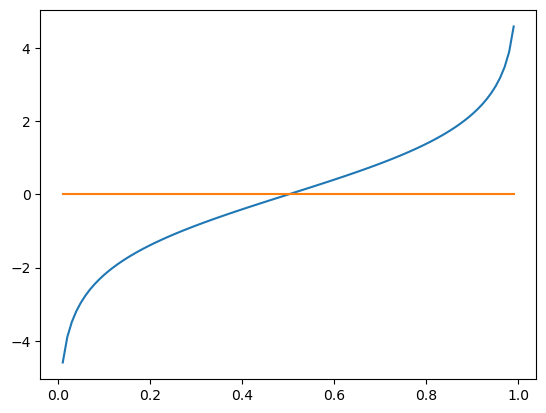

In [32]:
plt.plot(ProbP, Log_OR)
plt.plot(ProbP, np.zeros(101))

In [34]:
data = pd.DataFrame()
data['ProbP'] = ProbP
data['OddsRatio'] = OddsRatio
data['Log_OR'] = Log_OR 

In [37]:
data

,ProbP,OddsRatio,Log_OR,PD
0,0.0100,0.010101,-4.595120,0.9900
1,0.0198,0.020200,-3.902075,0.9802
2,0.0296,0.030503,-3.489934,0.9704
3,0.0394,0.041016,-3.193792,0.9606
4,0.0492,0.051746,-2.961410,0.9508
...,...,...,...,...
96,0.9508,19.325203,2.961410,0.0492
97,0.9606,24.380711,3.193792,0.0394
98,0.9704,32.783784,3.489934,0.0296
99,0.9802,49.505051,3.902075,0.0198


In [ ]:
# FICO score

In [36]:
data['PD'] = 1 - ProbP

https://www.researchgate.net/publication/330724392/figure/tbl2/AS:720594295332864@1548814476207/US-distribution-of-FICO-credit-scores-and-probability-of-default-by-FICO-credit-scores.png

https://www.researchgate.net/publication/330724392_An_Empirical_Comparison_of_Machine-Learning_Methods_on_Bank_Client_Credit_Assessments/download?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ

In [38]:
data['FICO'] = 499
data.loc[data['PD'] < .410, 'FICO'] = 499
data.loc[data['PD'] < .284, 'FICO'] = 549
data.loc[data['PD'] < .225, 'FICO'] = 599
data.loc[data['PD'] < .158, 'FICO'] = 649
data.loc[data['PD'] < .089, 'FICO'] = 699
data.loc[data['PD'] < .044, 'FICO'] = 749
data.loc[data['PD'] < .010, 'FICO'] = 800


In [45]:
data['lFICO'] = 0
data.loc[data['PD'] < .410, 'lFICO'] = 200
data.loc[data['PD'] < .284, 'lFICO'] = 500
data.loc[data['PD'] < .225, 'lFICO'] = 550
data.loc[data['PD'] < .158, 'lFICO'] = 600
data.loc[data['PD'] < .089, 'lFICO'] = 650
data.loc[data['PD'] < .044, 'lFICO'] = 700
data.loc[data['PD'] < .010, 'lFICO'] = 750


In [39]:
data

,ProbP,OddsRatio,Log_OR,PD,FICO
0,0.0100,0.010101,-4.595120,0.9900,499
1,0.0198,0.020200,-3.902075,0.9802,499
2,0.0296,0.030503,-3.489934,0.9704,499
3,0.0394,0.041016,-3.193792,0.9606,499
4,0.0492,0.051746,-2.961410,0.9508,499
...,...,...,...,...,...
96,0.9508,19.325203,2.961410,0.0492,699
97,0.9606,24.380711,3.193792,0.0394,749
98,0.9704,32.783784,3.489934,0.0296,749
99,0.9802,49.505051,3.902075,0.0198,749


In [41]:
data['pFICO'] = data['Log_OR']*200

<AxesSubplot:xlabel='PD'>

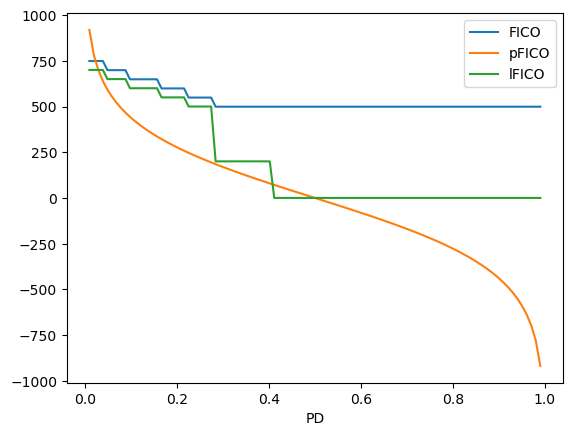

In [46]:
data.plot('PD',['FICO','pFICO','lFICO'])

In [ ]:
# Градиентный спуск

In [49]:
x = np.linspace(-2,2,100)
y = x ** 2

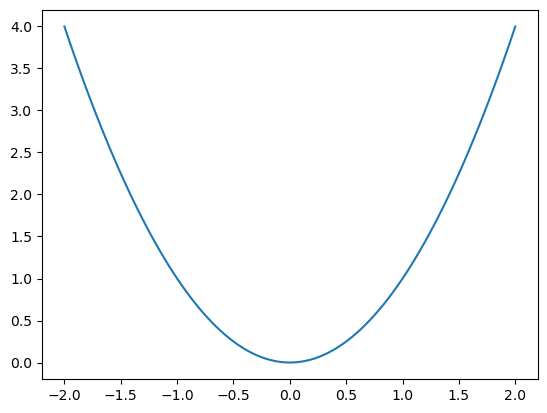

In [50]:
plt.plot(x, y)

In [67]:
x0 = 2 # Начальный x = 2
a = .1 # Скорость обучения

x_list = [2]
y_list = [4]

for i in range(10000):
    
    Grad = 2 * x0
    x0 = x0 - a * Grad
    y0 = x0 ** 2
    
    if i < 10:
        print('x', x0, 'y', y0)
        x_list.append(x0)
        y_list.append(y0)
        
print('...')
print('x', x0, 'y', y0)
    
    

x 1.6 y 2.5600000000000005
x 1.28 y 1.6384
x 1.024 y 1.048576
x 0.8192 y 0.67108864
x 0.65536 y 0.42949672960000007
x 0.5242880000000001 y 0.2748779069440001
x 0.4194304000000001 y 0.17592186044416008
x 0.33554432000000006 y 0.11258999068426244
x 0.26843545600000007 y 0.07205759403792797
x 0.21474836480000006 y 0.046116860184273904
...
x 1e-323 y 0.0


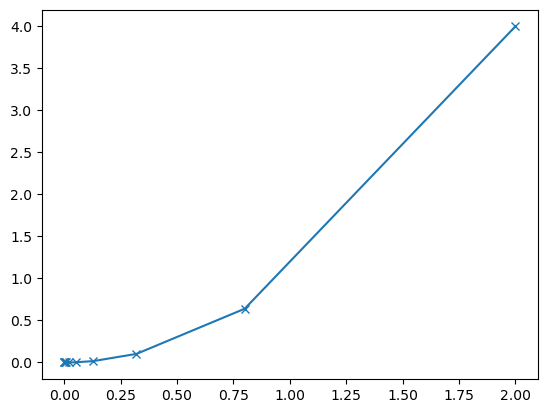

In [66]:
plt.plot(x_list, y_list, marker='x')

In [68]:
x_1 = x_list
y_1 = y_list

In [69]:
x0 = 2 # Начальный x = 2
a = .3 # Скорость обучения

x_list = [2]
y_list = [4]

for i in range(10000):
    
    Grad = 2 * x0
    x0 = x0 - a * Grad
    y0 = x0 ** 2
    
    if i < 10:
        print('x', x0, 'y', y0)
        x_list.append(x0)
        y_list.append(y0)
        
print('...')
print('x', x0, 'y', y0)
    
    

x 0.8 y 0.6400000000000001
x 0.32000000000000006 y 0.10240000000000005
x 0.12800000000000003 y 0.016384000000000006
x 0.05120000000000001 y 0.002621440000000001
x 0.020480000000000005 y 0.00041943040000000023
x 0.008192000000000003 y 6.710886400000005e-05
x 0.0032768000000000016 y 1.073741824000001e-05
x 0.001310720000000001 y 1.7179869184000023e-06
x 0.0005242880000000004 y 2.748779069440004e-07
x 0.00020971520000000014 y 4.398046511104006e-08
...
x 0.0 y 0.0


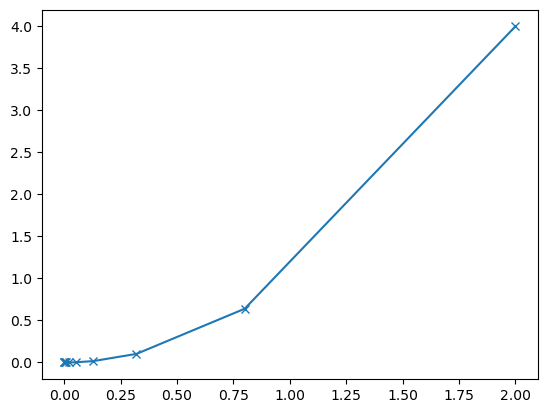

In [70]:
plt.plot(x_list, y_list, marker='x')

In [71]:
x_2 = x_list
y_2 = y_list

In [74]:
x0 = 2 # Начальный x = 2
a = .6 # Скорость обучения

x_list = [2]
y_list = [4]

for i in range(10000):
    
    Grad = 2 * x0
    x0 = x0 - a * Grad
    y0 = x0 ** 2
    
    if i < 10:
        print('x', x0, 'y', y0)
        x_list.append(x0)
        y_list.append(y0)
        
print('...')
print('x', x0, 'y', y0)
    
    

x -0.3999999999999999 y 0.15999999999999992
x 0.07999999999999996 y 0.006399999999999993
x -0.015999999999999986 y 0.00025599999999999955
x 0.003199999999999998 y 1.0239999999999987e-05
x -0.0006399999999999995 y 4.095999999999994e-07
x 0.00012799999999999986 y 1.6383999999999963e-08
x -2.5599999999999972e-05 y 6.553599999999986e-10
x 5.119999999999992e-06 y 2.6214399999999915e-11
x -1.0239999999999982e-06 y 1.0485759999999962e-12
x 2.047999999999995e-07 y 4.1943039999999796e-14
...
x 0.0 y 0.0


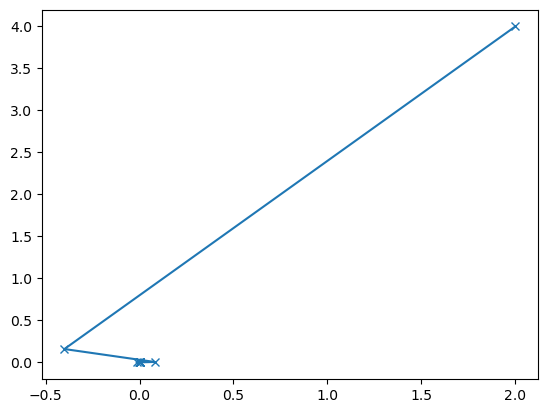

In [75]:
plt.plot(x_list, y_list, marker='x')

In [76]:
x_3 = x_list
y_3 = y_list

In [81]:
x0 = 2 # Начальный x = 2
a = .5 # Скорость обучения

x_list = [2]
y_list = [4]

for i in range(10000):
    
    Grad = 2 * x0
    x0 = x0 - a * Grad
    y0 = x0 ** 2
    
    if i < 10:
        print('x', x0, 'y', y0)
        x_list.append(x0)
        y_list.append(y0)
        
print('...')
print('x', x0, 'y', y0)
    
    

x 0.0 y 0.0
x 0.0 y 0.0
x 0.0 y 0.0
x 0.0 y 0.0
x 0.0 y 0.0
x 0.0 y 0.0
x 0.0 y 0.0
x 0.0 y 0.0
x 0.0 y 0.0
x 0.0 y 0.0
...
x 0.0 y 0.0


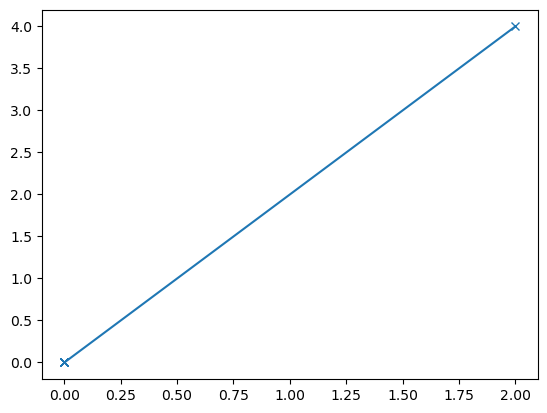

In [82]:
plt.plot(x_list, y_list, marker='x')

In [83]:
x_4 = x_list
y_4 = y_list

In [84]:
x0 = 2 # Начальный x = 2
a = 1 # Скорость обучения

x_list = [2]
y_list = [4]

for i in range(10000):
    
    Grad = 2 * x0
    x0 = x0 - a * Grad
    y0 = x0 ** 2
    
    if i < 10:
        print('x', x0, 'y', y0)
        x_list.append(x0)
        y_list.append(y0)
        
print('...')
print('x', x0, 'y', y0)
    
    

x -2 y 4
x 2 y 4
x -2 y 4
x 2 y 4
x -2 y 4
x 2 y 4
x -2 y 4
x 2 y 4
x -2 y 4
x 2 y 4
...
x 2 y 4


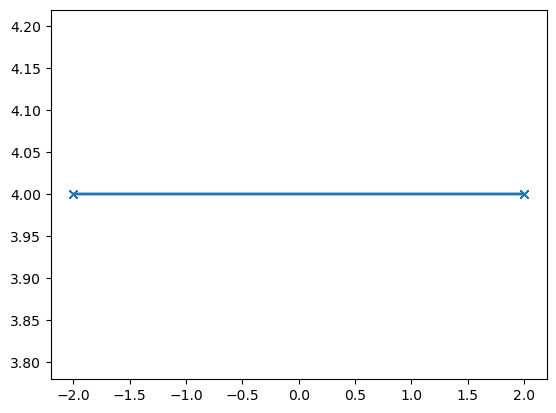

In [85]:
plt.plot(x_list, y_list, marker='x')

In [86]:
x_5 = x_list
y_5 = y_list

In [101]:
x0 = 2 # Начальный x = 2
a = 1.01 # Скорость обучения

x_list = [2]
y_list = [4]

for i in range(10000):
    
    Grad = 2 * x0
    x0 = x0 - a * Grad
    y0 = x0 ** 2
    
    if i < 10:
        print('x', x0, 'y', y0)
        x_list.append(x0)
        y_list.append(y0)
        
print('...')
print('x', x0, 'y', y0)
    
    

x -2.04 y 4.1616
x 2.0808 y 4.32972864
x -2.1224160000000003 y 4.504649677056001
x 2.1648643200000004 y 4.686637524009064
x -2.2081616064 y 4.875977679979028
x 2.2523248385279997 y 5.07296717825018
x -2.2973713352985596 y 5.277915052251487
x 2.3433187620045306 y 5.4911428203624455
x -2.3901851372446217 y 5.712984990305091
x 2.437988839989514 y 5.943789583913417
...
x 2.007925591002713e+86 y 4.031765179003594e+172


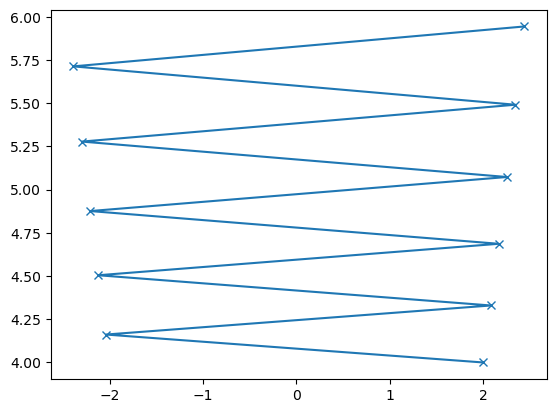

In [102]:
plt.plot(x_list, y_list, marker='x')

In [103]:
x_6 = x_list
y_6 = y_list

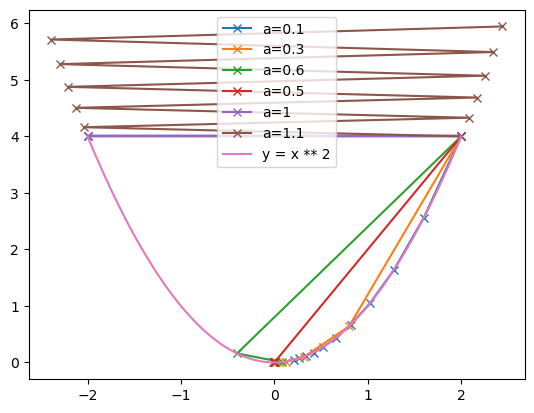

In [104]:
plt.plot(x_1, y_1, marker='x', label='a=0.1')
plt.plot(x_2, y_2, marker='x', label='a=0.3')
plt.plot(x_3, y_3, marker='x', label='a=0.6')
plt.plot(x_4, y_4, marker='x', label='a=0.5')
plt.plot(x_5, y_5, marker='x', label='a=1')
plt.plot(x_6, y_6, marker='x', label='a=1.1')
plt.plot(x, y, label='y = x ** 2')
plt.legend()
plt.show()